![](https://imgur.com/QnT31vZ.png)

---

# Sobre o desafio

Neste desafio, suponhamos que tenhamos sido recrutados como cientistas de dados pela empresa de telecomunicações **Novexus**. Durante nossa reunião introdutória com os responsáveis da equipe de vendas da organização, foi destacada a significância da redução da **Taxa de Churn**, também conhecida como **Taxa de Evasão de Clientes**.

## Problemática

O setor de telecomunicações é amplamente saturado, predominantemente composto por serviços padronizados com poucas oportunidades para diferenciação. Isso resulta em uma indústria altamente competitiva, onde a [taxa de perda de clientes é excepcionalmente alta](https://www.sciencedirect.com/science/article/abs/pii/S004579061200167X). 

As implicações financeiras do Churn são amplamente reconhecidas - estima-se que adquirir [um novo cliente custa de 5 a 25 vezes mais do que manter um cliente existente](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers). Isso envolve despesas adicionais com marketing, processos de integração, taxas de serviço, entre outros. Além disso, não há garantia de sucesso na aquisição de novos clientes. Em contrapartida, reduzir a taxa Churn é consideravelmente mais econômico.

Outra consequência do Churn é o potencial impacto na imagem de marca da empresa. Além da perda de receita devido à saída de clientes, pode ocorrer dano à reputação da empresa devido a comentários negativos e avaliações desfavoráveis. Isso, sem dúvida, teria um impacto significativo nos resultados financeiros da empresa e em suas perspectivas de crescimento futuro.

## Objetivo

Os principais objetivos da nossa estratégia analítica voltada para a retenção de clientes, que combina a análise das variáveis relacionadas ao churn de clientes e a implementação de um modelo preditivo. Esses objetivos têm como objetivo direcionar nossa abordagem e medir o sucesso da iniciativa:

1. **Compreensão Profunda das Variáveis do Churn de Clientes**: O primeiro objetivo é adquirir uma compreensão detalhada das variáveis e fatores que influenciam o churn de clientes na Novexus. Isso envolve a identificação de padrões, tendências e correlações nas informações disponíveis, permitindo-nos identificar os principais impulsionadores do churn.

2. **Desenvolvimento de um Modelo Preditivo**: Um dos principais marcos é o desenvolvimento de um modelo que possa prever o churn de clientes.

3. **Monitoramento e Aprendizado Contínuo**: Além dos objetivos imediatos, estabelecemos o objetivo de manter um processo de monitoramento constante e aprendizado contínuo. Isso envolve a avaliação contínua do desempenho do modelo preditivo e a adaptação às mudanças nas variáveis que afetam o churn de clientes.

<div style="background-color: #171821; color: white; padding: 10px; text-align: center; font-size: 20px;">
    <h1>Informações gerais do Conjunto de dados</h1>
</div>

## Acesso aos dados, normalização e visualização rápida do cabeçalho

In [1]:
import pandas as pd
import requests
import json

url = 'https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json'
dados = pd.json_normalize(requests.get(url).json())
dados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [2]:
print(f'Temos {dados.shape[0]} instâncias com {dados.shape[1]} colunas')

Temos 7267 instâncias com 21 colunas


In [3]:
# Salvando os dados originais
dados.to_csv('data/dados_novexus.csv', index = False)

## Leitura do dicionário dos dados

In [4]:
import os
url_info = 'https://challenge-data-science-3ed.s3.amazonaws.com/dicionario.md'

response = requests.get(url_info).content.decode('utf-8')
nome_arquivo = 'dicionario_colunas.txt'
path = os.path.join('data', nome_arquivo)

with open(path, 'w', encoding='utf-8') as arquivo:
  arquivo.write(response)

print(response)

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de co

## Valores únicos e análise da tipagem dos dados

In [5]:
import utils.justdoit as jdi
jdi.info_dataframe(dados)

,Tipo,Valores Únicos
customerID,object,"[0002-ORFBO, 0003-MKNFE, 0004-TLHLJ, 0011-IGKF..."
Churn,object,"[No, Yes, ]"
customer.gender,object,"[Female, Male]"
customer.SeniorCitizen,int64,"[0, 1]"
customer.Partner,object,"[Yes, No]"
customer.Dependents,object,"[Yes, No]"
customer.tenure,int64,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
phone.PhoneService,object,"[Yes, No]"
phone.MultipleLines,object,"[No, Yes, No phone service]"
internet.InternetService,object,"[DSL, Fiber optic, No]"


Algumas observações:

- A coluna `Churn` possui alguns valores em branco.
- A coluna `Charges.Total` é sinalizada como tipo `object` (strings).

Vamos analisar a coluna `Charges.Total`:

In [6]:
print(list(dados['account.Charges.Total'].head()))

['593.3', '542.4', '280.85', '1237.85', '267.4']


Observe que, embora os valores sejam números decimais (float), eles estão sendo apresentados como strings. Vamos converter para o tipo float:

In [7]:
tratamentos = jdi.Tratamentos(dados)
tratamentos.string_to_float(colunas = 'account.Charges.Total')

In [8]:
dados.isna().sum()

customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64

Quando convertemos a coluna `account.Charges.Total` de tipo 'object' para 'float64', observamos a presença de valores ausentes no conjunto de dados.

<div style="background-color: #171821; color: white; padding: 10px; text-align: center; font-size: 20px;">
    <h1> Tratamento inicial das incosistências nos dados </h1>
</div>

Resolvendo o problema dos dados em branco para a coluna `Churn`: excluindo essas instâncias!

In [9]:
dados = tratamentos.remove_ausentes(colunas = 'Churn', string = True)

Vamos agora olhar o caso da coluna `account.Charges.Total`:

In [10]:
dados[['customer.tenure', 
       'account.Charges.Monthly', 'account.Charges.Total']].loc[dados['account.Charges.Total'].isna()]

,customer.tenure,account.Charges.Monthly,account.Charges.Total
945,0,56.05,NaN
1731,0,20.00,NaN
1906,0,61.90,NaN
2025,0,19.70,NaN
2176,0,20.25,NaN
2250,0,25.35,NaN
2855,0,73.35,NaN
3052,0,25.75,NaN
3118,0,52.55,NaN
4054,0,80.85,NaN


Perceba que a coluna `tenure` indica a duração do contrato em meses para os clientes. Nesse caso, esses clientes são recém-chegados à empresa Novexus, o que sugere que a coluna `account.Charges.Total` possivelmente não contenha valores devido ao fato de que o mês ainda não foi concluído. Portanto, o valor total deve corresponder aos valores presentes na coluna `account.Charges.Monthly`.

In [11]:
dados.loc[dados['account.Charges.Total'].isna(), 
          'account.Charges.Total'] = dados['account.Charges.Monthly']

Além disso, vamos excluir a coluna `customerID`, pois é simplesmente uma coluna de identificador:

In [12]:
dados = tratamentos.remove_colunas('customerID')

<div style="background-color: #171821; color: white; padding: 10px; text-align: center; font-size: 20px;">
    <h1> Exploratory Data Analysis </h1>
</div>

## Paleta de cores

![](https://imgur.com/flj5sG5.png)

In [13]:
# palette = 'novexus'
paleta = ['#171821', '#872b95', '#ff7131', '#fe3d67']

## Visualização da variável target (Churn)

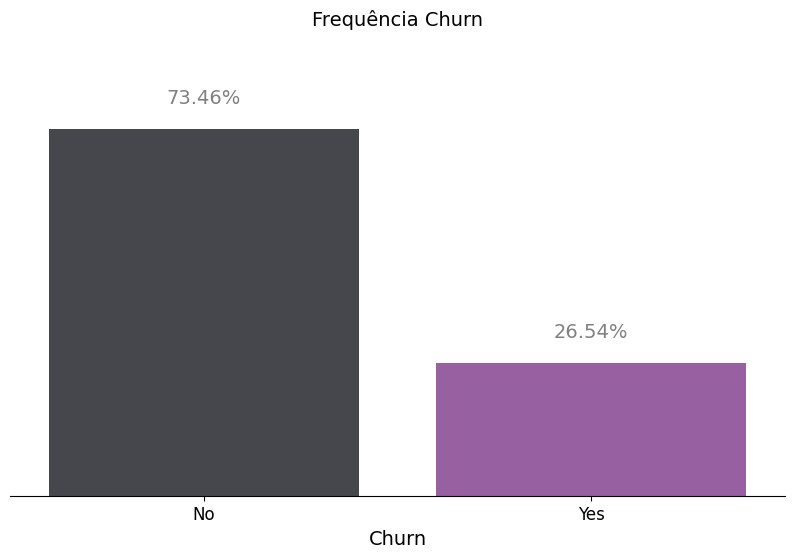

In [14]:
import utils.justplotit as jpi
jpi.frequencia_churn(dados)

Os dados estão desequilibrados, com uma grande maioria de clientes (cerca de 73.46%) que não cancelaram o serviço, enquanto apenas 26.54% cancelaram. Isso significa que qualquer previsão feita com esses dados provavelmente favorecerá os clientes que não cancelaram o serviço.

## Features categóricas versus Churn

### Grupo 1: Features com informações sobre os clientes

In [15]:
grupo_1 = dados.filter(like='customer').columns.tolist()[:-1]

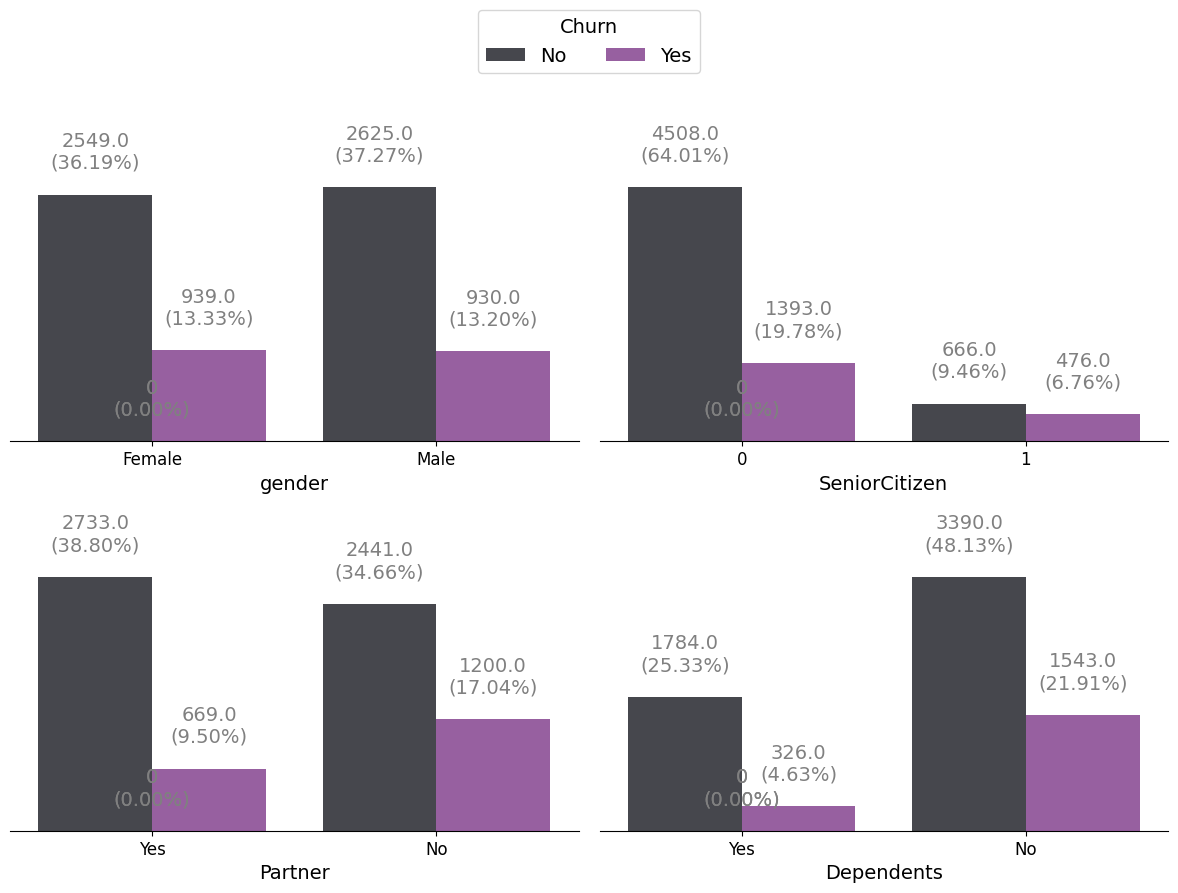

In [16]:
jpi.countplots(dados, 'Churn', grupo_1, paleta)

A taxa de cancelamento de clientes é praticamente igual tanto para homens quanto para mulheres. Além disso, o número de clientes idosos é relativamente baixo. Os clientes que vivem com um parceiro têm menos probabilidade de cancelar em comparação com aqueles que não têm parceiros. Da mesma forma, as taxas de cancelamento são mais altas entre os clientes que não têm dependentes.

### Grupo 2: Features com serviços telefônicos

In [17]:
grupo_2 = dados.filter(like='phone').columns.tolist()

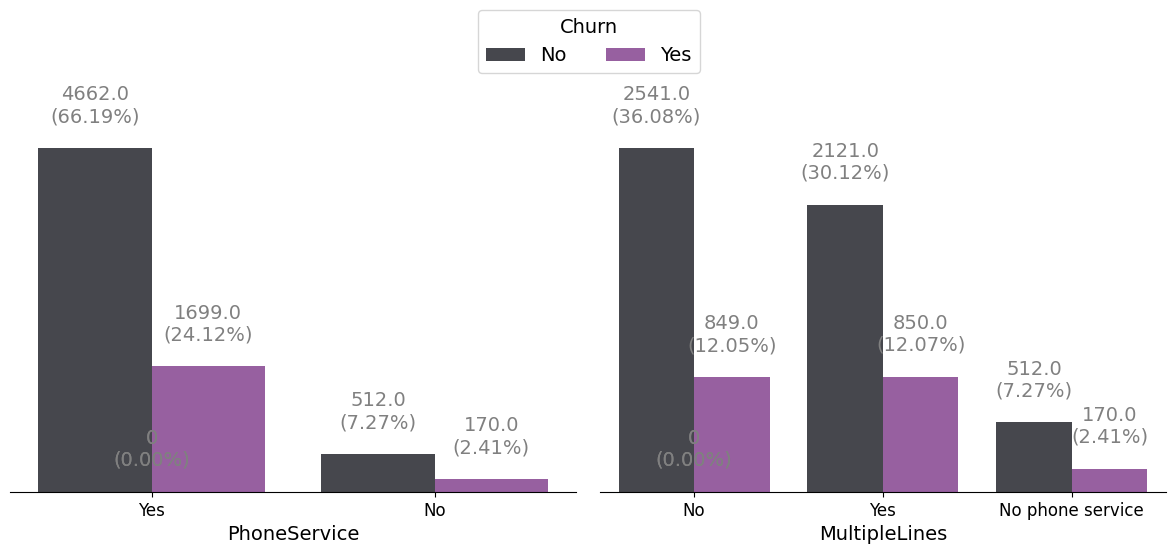

In [18]:
jpi.countplots(dados, 'Churn', grupo_2, paleta, figsize=(12, 5))

Para o PhoneService, mesmo que alguns clientes não tenham serviço telefônico, mais deles foram mantidos em comparação com o número de clientes que decidiram interromper o serviço. Em relação às MultipleLines (Múltiplas Linhas), a taxa de cancelamento permanece a mesma, quer os clientes tenham ou não várias linhas.

### Grupo 3: Features com serviços de internet

In [19]:
grupo_3 = dados.filter(like='internet').columns.tolist()

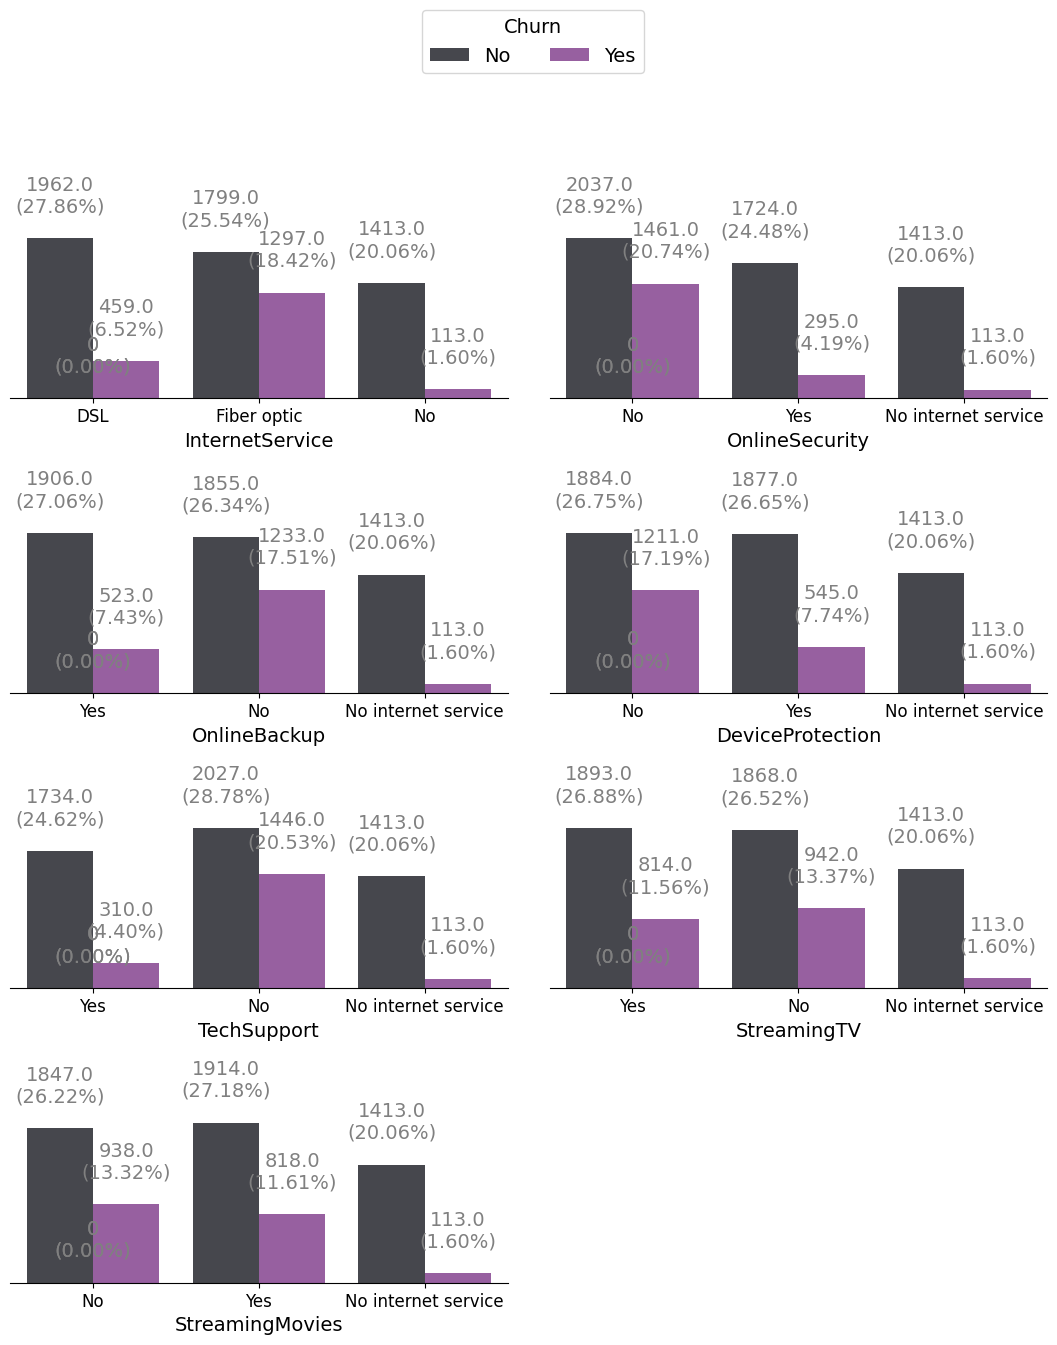

In [20]:
jpi.countplots(dados, 'Churn', grupo_3, paleta, figsize=(11, 12))

Muitos clientes mostraram hesitação em adotar cabos de fibra ótica como meio de fornecer serviços de Internet. Pelo contrário, de acordo com o primeiro gráfico, os clientes têm preferência por utilizar DSL para acessar a Internet. 

As categorias de Streaming de TV e Streaming de Filmes apresentam gráficos praticamente idênticos. Independentemente de estarem inscritos em Streaming de TV ou Streaming de Filmes, alguns clientes optaram por cancelar o serviço. Parece que o conteúdo de streaming não foi o único fator responsável por essa decisão.

No que diz respeito à satisfação dos clientes, fica evidente, a partir dos gráficos, que serviços como OnlineSecurity, OnlineBackup, DeviceProtection e TechSupport desempenham um papel fundamental. Um considerável quantidade de clientes que não possuiam essses serviços optaram deixar a empresa Novexus.

### Grupo 4: Features com assuntos financeiros dos clientes

In [21]:
grupo_4 = dados.filter(like='account').columns.tolist()[:-2]

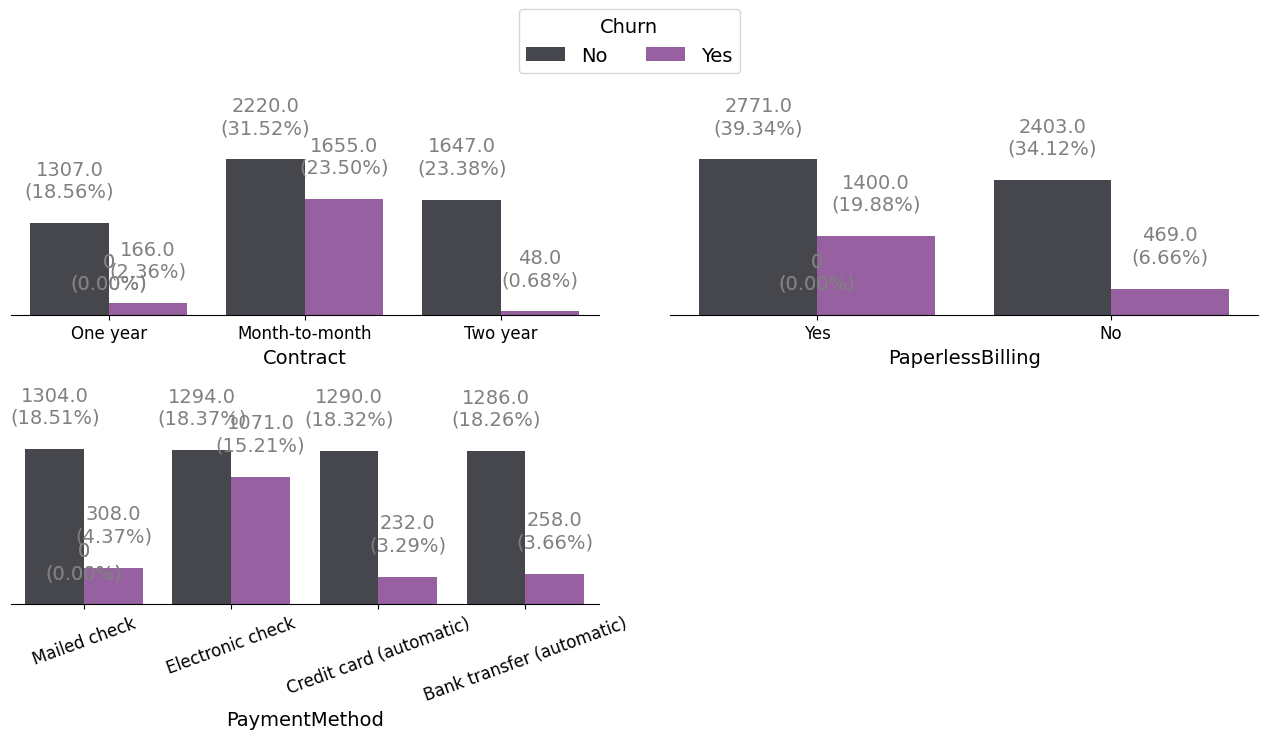

In [22]:
import matplotlib.pyplot as plt
jpi.countplots(dados, 'Churn', grupo_4, paleta, figsize=(13, 6))
plt.xticks(rotation=20)
plt.show()

A alta taxa de rotatividade de clientes em contratos mensais pode ser atribuída a várias razões. Uma delas é a possibilidade de os clientes estarem experimentando diferentes serviços disponíveis, optando pelo contrato de um mês como uma forma de economizar dinheiro enquanto testam. Além disso, a inconsistência na qualidade dos serviços de Internet, streaming e telefone pode ser outro fator contribuinte. Como as prioridades dos clientes variam, se um desses serviços não atender às expectativas, muitas vezes resulta no cancelamento de todos os serviços. No entanto, são necessárias mais informações sobre as políticas das empresas de telecomunicações para quaisquer conclusões significativas.

É interessante observar que existe uma incidência de clientes que deixam a empresa por preferirem a fatura online em comparação com aqueles que não a preferem. Isso pode estar relacionado a problemas de pagamento ou recebimento que os clientes enfrentam. É evidente que os clientes não estão satisfeitos com o método de pagamento por cheque eletrônico, por exemplo. Portanto, a empresa claramente precisa reconsiderar o uso do cheque eletrônico como forma de pagamento, optando por simplificá-lo e torná-lo mais amigável para os clientes ou mesmo considerar a sua eliminação.

## Features numércias

In [23]:
features_num = dados.select_dtypes(exclude=['object']).iloc[:, 1:]  # Excluindo o SeniorCitizen
features_num.head()

,customer.tenure,account.Charges.Monthly,account.Charges.Total
0,9,65.6,593.30
1,9,59.9,542.40
2,4,73.9,280.85
3,13,98.0,1237.85
4,3,83.9,267.40


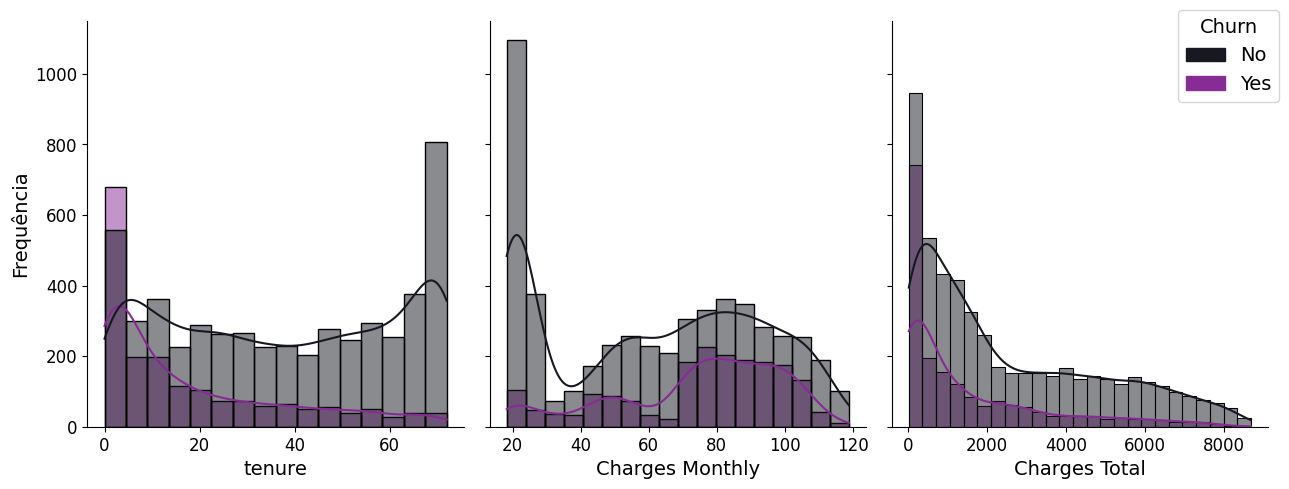

In [24]:
jpi.histogramas(dados, features_num, paleta)

Tenure e Charges Monthly possuem uma distribuição bimodal, apresentando picos notáveis em 0 e 70 para a Tenure e 20 e 80 para as Charges Monthly. Por outro lado, TotalCharges demonstra uma distribuição assimétrica positiva (caldas longas).

Observe que é evidente que os clientes com poucos meses de experiência na empresa têm maior probabilidade de sair em comparação àqueles que têm uma longa história de fidelidade. Além disso, os gastos mensais são consideravelmente menores para os clientes que permaneceram na empresa em comparação àqueles que a deixaram.

### Boxplot para as variáveis numéricas com Churn

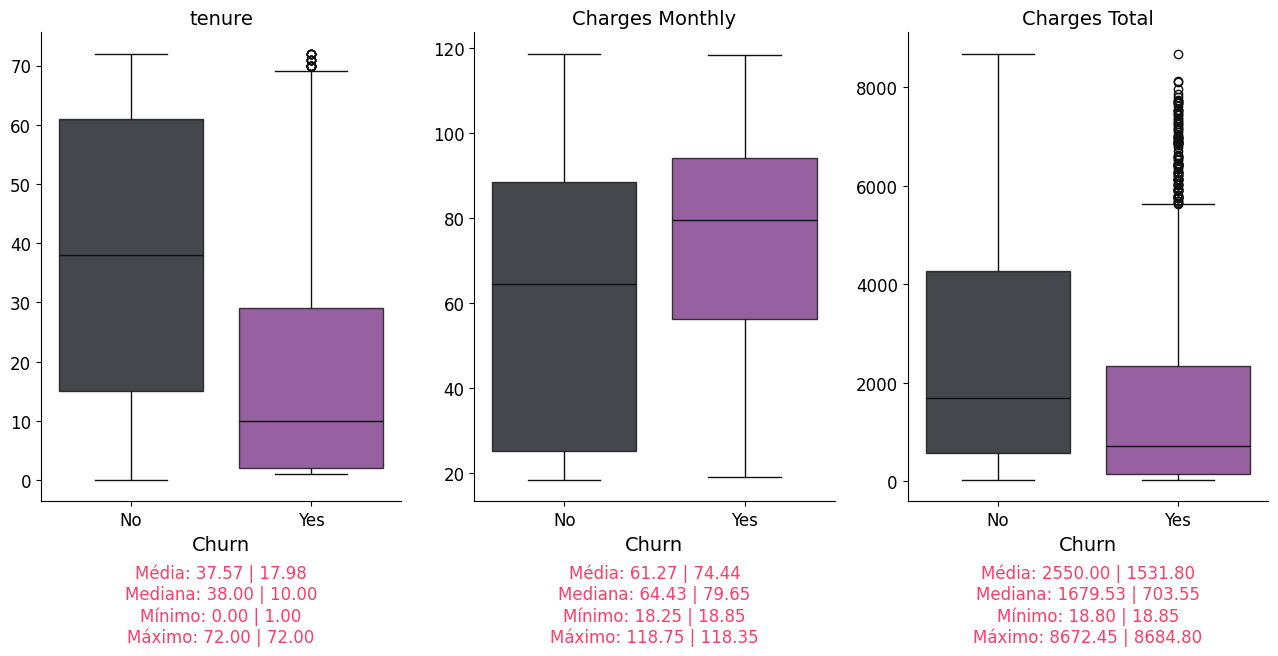

In [25]:
jpi.boxplots(dados, features_num, paleta)

Os clientes que optam por continuar têm, em média, contratos mais longos em comparação com aqueles que decidem cancelar. De forma surpreendente, os clientes que cancelaram seus contratos apresentam, em média, gastos mensais mais elevados do que os que permaneceram. Isso merece atenção, pois sugere a possibilidade de que clientes com despesas mais substanciais possam ser mais propensos a cancelar (talvez devido a variações nos tipos de serviços utilizados, como mencionado anteriormente). Além disso, é interessante observar que os clientes que cancelaram têm uma média de gastos totais mais baixa do que os que continuaram. Isso indica que, embora gastem mais em base mensal, essa tendência não se mantém a longo prazo, o que levanta a hipótese de que clientes com despesas mais elevadas não necessariamente representam maior valor a longo prazo para a empresa.

<div style="background-color: #171821; color: white; padding: 10px; text-align: center; font-size: 20px;">
    <h1> Análise da correlação das variáveis + Extra</h1>
</div>

A utilização da correlação pode aprimorar a acurácia do modelo ao eliminar variáveis preditoras sem relevância. Quando uma variável não demonstra uma correlação significativa com a variável-alvo, é provável que possua pouco poder informativo, não contribuindo de maneira substancial para o modelo e, em certos cenários, podendo até induzir overfitting.

## Correlação entre as features

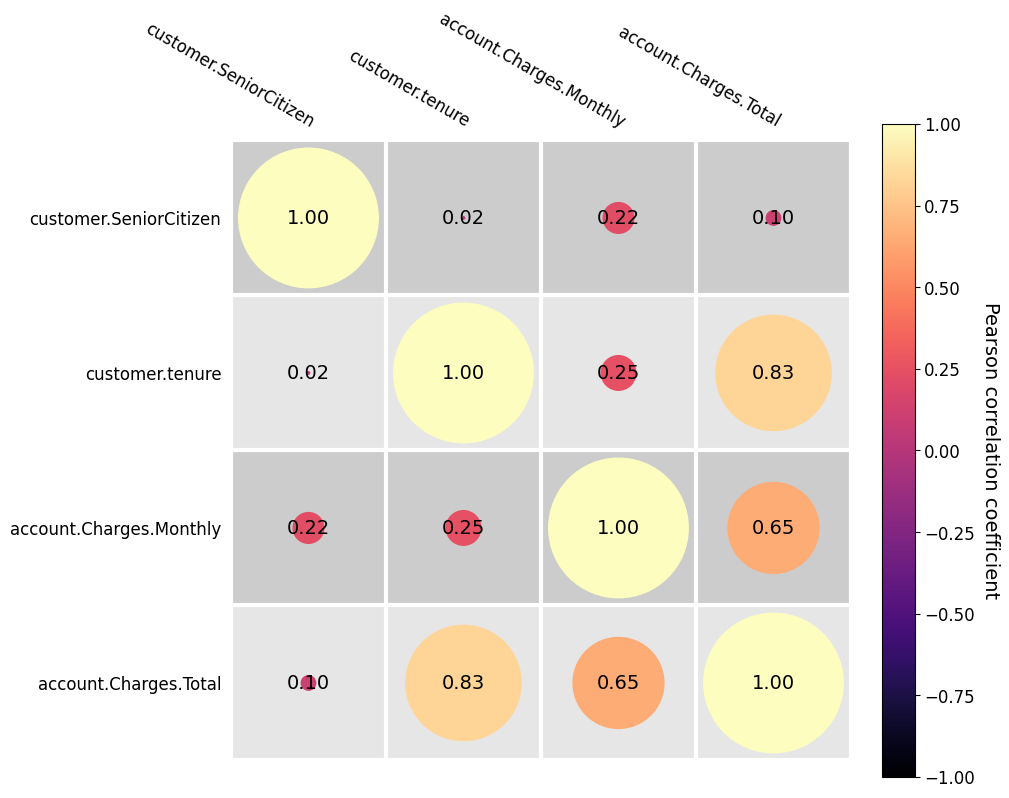

In [29]:
from psynlig import plot_correlation_heatmap

dados_numericos = dados.select_dtypes(include=['number'])

kwargs = {
    'heatmap': {
        'vmin': -1,
        'vmax': 1,
        'cmap': 'magma',
    },
    'figure': {
        'figsize': (10, 8),
    },
}

plot_correlation_heatmap(dados_numericos, bubble=True, annotate=True, **kwargs);

Observe que a coluna `customer.tenure` tem uma correlação muito forte com `account.Charges.Total`. Esse alto coeficiente de correlação pode ser uma indicação de multicolinearidade, impactando negativamente a precisão do nosso modelo futuro, podemos pensar em descartar essa coluna.

Além disso, vamos renomear as colunas para que possa ser mais fácil para trabalharmos na próxima etapa e salvar nossos dados:

In [30]:
dados.rename(columns=lambda x: jdi.renomear_coluna(x), inplace=True)

In [31]:
jdi.info_dataframe(dados)

,Tipo,Valores Únicos
Churn,object,"[No, Yes]"
Gender,object,"[Female, Male]"
Seniorcitizen,int64,"[0, 1]"
Partner,object,"[Yes, No]"
Dependents,object,"[Yes, No]"
Tenure,int64,"[9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34..."
Phoneservice,object,"[Yes, No]"
Multiplelines,object,"[No, Yes, No phone service]"
Internetservice,object,"[DSL, Fiber optic, No]"
Onlinesecurity,object,"[No, Yes, No internet service]"


In [32]:
# Salvando os dados com os tratamentos iniciais
dados.to_csv('data/dados_tratados.csv', index = False)

Pronto, nosso dados estão analisados o suficientes, podemos prosseguir para o próximo passo!